<a href="https://colab.research.google.com/github/seom0000/com2022/blob/main/ex01_%ED%9A%8C%EA%B7%80_%EB%8C%80%ED%95%99%EC%B7%A8%EC%97%85%EB%A5%A0%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Uni-variate Regression
1) 데이터 수집

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('drive/MyDrive/2022 전산학_colab/univ_info_small.csv')

In [4]:
# 1,2,3,4 열 중 하나라도 0인 값이 있는 행을 제거

id_remove = df[ (df['전임교원 1인당 학생 수']==0) |
               (df['취업률']==0) |
               (df['전임교원 강의 담당 비율']==0) |
               (df['취업률']==0)].index
print(id_remove)

Int64Index([   1,    7,   10,   26,   35,   49,   50,   51,   56,   63,
            ...
            1653, 1664, 1666, 1675, 1683, 1686, 1688, 1700, 1707, 1721],
           dtype='int64', length=221)


In [5]:
print(df)
df2 = df.drop(id_remove, axis=0)
print(df2)

            학교명  전임교원 1인당 학생 수  전임교원 확보율  전임교원 강의 담당 비율   취업률
0      ICT폴리텍대학          18.82    106.25           72.6  74.5
1     가야대학교(고령)           0.00      0.00            0.0   0.0
2     가야대학교(김해)          33.74     64.44           79.9  76.1
3         가천대학교          20.35    101.01           67.6  66.5
4      가톨릭관동대학교          21.77     97.12           72.2  64.4
...         ...            ...       ...            ...   ...
1717      호원대학교          29.93     69.44           53.7  73.9
1718      홍익대학교          27.90     74.34           72.3  62.1
1719      홍익대학교          26.86     78.00           73.1  64.8
1720   화성의과학대학교          28.94     72.34           74.9  62.8
1721   화신사이버대학교         154.44    128.57           61.5   0.0

[1722 rows x 5 columns]
            학교명  전임교원 1인당 학생 수  전임교원 확보율  전임교원 강의 담당 비율   취업률
0      ICT폴리텍대학          18.82    106.25           72.6  74.5
2     가야대학교(김해)          33.74     64.44           79.9  76.1
3         가천대학교          20.35    101.01     

In [6]:
# numpy 배열로 변환
df_np = df2.to_numpy()
print(df_np)

[['ICT폴리텍대학' 18.82 106.25 72.6 74.5]
 ['가야대학교(김해)' 33.74 64.44 79.9 76.1]
 ['가천대학교' 20.35 101.01 67.6 66.5]
 ...
 ['홍익대학교' 27.9 74.34 72.3 62.1]
 ['홍익대학교' 26.86 78.0 73.1 64.8]
 ['화성의과학대학교' 28.94 72.34 74.9 62.8]]


### 2) 특징 추출

In [8]:
x = df_np[:, 3]   # 전임교원 강의 담당 비율
y = df_np[:, -1]  # 취업률
m = len(df_np)    # 행 개수

In [9]:
print(x.shape)
x = x.reshape(m, 1)
print(x.shape)

(1501,)
(1501, 1)


### * (강의노트 제작 입장) "좋은 회귀선이 나올 것 같지 않네"

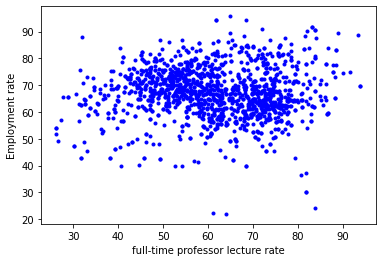

In [11]:
plt.plot(x, y, 'b.')
plt.xlabel("full-time professor lecture rate")  # 전임교원 강의 담당 비율(%)
plt.ylabel("Employment rate")                   # 취업률(%)
plt.show()

### *(강의노트 제작 입장) "'전임교원 1인당 학생 수'로 바꾸자"

(1501, 1) (1501,)


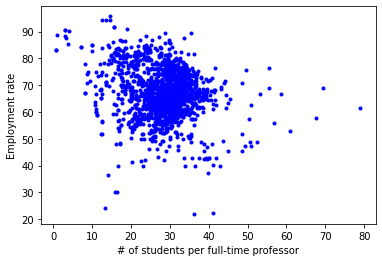

In [12]:
x = df_np[:, 1]
y = df_np[:, -1]
m = len(df_np)  # 행 개수

x = x.reshape(m, 1)
print(x.shape, y.shape)

plt.plot(x, y, 'b.')
plt.xlabel("# of students per full-time professor") # 전임교원 1인당 학생 수(명)
plt.ylabel("Employment rate")                       # 취업률(%)
plt.show()

In [13]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.1)

In [14]:
len(x), len(train_x), len(test_x), len(train_y), len(test_y)

(1501, 1350, 151, 1350, 151)

### 3) 모델 설계, loss 함수 결정, 훈련

In [15]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(train_x, train_y)

LinearRegression()

ㅇㅇㅇㅇ

In [16]:
coef = regressor.coef_
intercept = regressor.intercept_
print('coef=', coef)
print('intercept=', intercept)

coef= [-0.25537503]
intercept= 74.25436449561205


### * 예측하기(predict/inference)
4) 임의의 전임교원 강의 담당 비율(%)에 대한 취업률 예측하기

In [17]:
# 어떤 대학교 전임교원 1인당 학생 수(명)가 70명, 20명이라면 취업률은 얼마일까?
regressor.predict([[70], [20]])

array([56.37811253, 69.14686393])

### 5) 회귀선으로 그리기

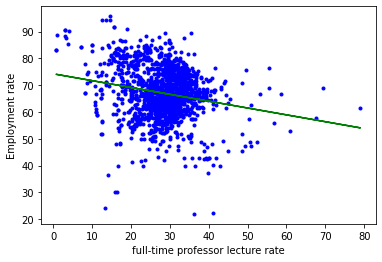

In [18]:
plt.plot(x, y, 'b.')
plt.plot(x, regressor.predict(x.reshape(m, 1)), color='green', label='Linear Regression')
plt.xlabel("full-time professor lecture rate")   # 전임교원 1인당 학생 수(명)
plt.ylabel("Employment rate")                    # 취업률(%)
plt.show()

In [19]:
train_pred = regressor.predict(train_x)
test_pred = regressor.predict(test_x)
print(train_pred, test_pred)

[67.84445129 67.19835247 66.03128859 ... 65.219196   66.64163491
 61.23023806] [66.18451361 66.51650114 66.87913368 67.69888752 67.48181875 68.08961132
 69.85169901 67.71676378 67.10897121 69.64484524 65.60991979 64.64715594
 65.56395229 66.72335492 67.39243749 66.52160864 65.50010853 65.03277223
 64.40965716 67.80614504 67.17281497 66.90722494 65.19110475 66.44499614
 65.66354855 66.03384234 66.64929616 66.49862489 68.54928637 67.53289376
 65.92147733 63.03573951 66.35306113 65.71973106 67.95937005 73.46780941
 64.87443971 68.46501261 65.80911232 69.780194   66.98383745 65.23707225
 64.41987216 66.1334386  66.47564114 66.84848868 68.10493382 66.66972616
 67.36689999 66.30453987 65.87295607 67.29539498 66.66206491 65.34688352
 69.51971147 71.1209129  67.73974753 67.5150175  67.08343371 71.11325165
 67.0374662  66.77698367 66.04405734 66.91233244 66.89190244 69.7444415
 69.790409   66.95319244 66.97362244 66.87147243 63.62054833 65.81932732
 68.31944884 71.41714793 65.81421982 67.453727

### * 모델 평가

In [20]:
from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(train_pred, train_y)
test_mse = mean_squared_error(test_pred, test_y)
print(train_mse, test_mse)

84.60826590129297 78.97663254007313


### 2) 특징 추출

In [21]:
x = df_np[:, 1:3]
y = df_np[:, -1]

In [22]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2)

In [23]:
len(x), len(train_x), len(test_x), len(train_y), len(test_y)

(1501, 1200, 301, 1200, 301)

### 3) 모델 설계, loss 함수 결정, 훈련

In [24]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(train_x, train_y)

LinearRegression()

ddd

In [26]:
coef = regressor.coef_            # theta1, theta2
intercept = regressor.intercept_  # theta0
print('coef=', coef)
print('intercept=', intercept)

coef= [-0.18360949  0.01359349]
intercept= 70.95370280928718


In [30]:
train_pred = regressor.predict(train_x)
test_pred = regressor.predict(test_x)
print(train_pred, test_pred)

[67.69337292 66.66700294 67.2670067  ... 65.91560163 69.23475813
 66.55919565] [66.36158803 65.6180456  71.49656377 65.5174604  65.68193499 65.10672084
 66.78734352 75.33708227 65.5174604  66.22590555 67.02925932 69.4106493
 65.75441555 66.16456581 69.44514753 65.64136136 66.4780367  66.38711456
 66.09249111 66.31856367 66.52490815 69.47010814 69.92393395 67.51238516
 66.11111882 67.24305878 65.57888467 66.59118247 65.52085682 67.8820556
 68.90923145 71.25211392 66.55303228 68.20604339 69.56821144 69.53483067
 66.86420592 68.45796697 65.79993934 66.86573312 67.10585105 65.67693463
 69.7755172  65.8181612  66.19195571 66.38915868 67.09761432 68.43138878
 65.52842946 66.31983459 67.40690436 66.59447488 69.32677434 68.1036696
 65.45428845 67.61053523 65.57091787 66.78414418 67.68124085 70.83354201
 66.58580232 66.45990401 66.65672255 68.32584877 68.70251303 65.71801034
 66.96783235 69.81719001 62.56986648 67.91165748 66.07347461 65.10701609
 65.92779215 65.2951453  67.47370877 66.2511797 

### * Train error < Test error

In [31]:
from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(train_pred, train_y)
test_mse = mean_squared_error(test_pred, test_y)
print(train_mse, test_mse)

85.38498555027586 76.47637559198304
